## importacion de librerias necesarias
 

In [1]:
!pip install opencv-python numpy

In [2]:
!pip install opencv-python-headless

In [4]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

## 1. Calibracion de la Cama

Con un teléfono celular se tomaron siete fotografías para calibrar la cámara.

In [13]:
# Definir las dimensiones del tablero de ajedrez (patrón de calibración)
CHECKERBOARD = (5, 8)


# Detener la iteración cuando se cumpla alguna de estas condiciones:
# se alcance la precisión ('epsilon') especificada, o
# se complete el número de iteraciones máximo especificado.
criteria = (cv2.TERM_CRITERIA_EPS + 
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [14]:
# Vector para puntos 3D (coordenadas del mundo real)
threedpoints = []

# Vector para puntos 2D (coordenadas de píxeles en la imagen)
twodpoints = []


# Coordenadas 3D de los puntos del mundo real (inicialización)
# Crea una matriz de ceros que contendrá las coordenadas (X, Y, Z)
# Z es cero porque el patrón está en un plano.
objectp3d = np.zeros((1, CHECKERBOARD[0] 
                      * CHECKERBOARD[1], 
                      3), np.float32)

# Rellena las coordenadas X e Y con la cuadrícula del tablero de ajedrez
# Asume que la distancia entre puntos es 1 unidad (ej. 1 cm o 1 pulgada).
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)

# Variable para almacenar la forma de la imagen previa (no utilizada en este fragmento)
prev_img_shape = None


In [15]:
# Extrayendo la ruta de las imágenes individuales almacenadas
# en un directorio dado. La ruta especificada es relativa.
# Solo se buscan archivos con extensión .jpeg.
images = glob.glob('../Imagenes_calibracion/*.jpeg')

In [16]:
# Define la ruta de destino para guardar las imágenes
OUTPUT_PATH = '../Imagenes_calibracion/'
# Crea el directorio de salida si no existe
if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)
    print(f"Directorio creado para guardar imágenes detectadas: {OUTPUT_PATH}")

Guardado: ../Imagenes_calibracion/detected_imagen1.jpeg
Guardado: ../Imagenes_calibracion/detected_imagen2.jpeg
Guardado: ../Imagenes_calibracion/detected_imagen3.jpeg
Guardado: ../Imagenes_calibracion/detected_imagen4.jpeg
Guardado: ../Imagenes_calibracion/detected_imagen5.jpeg
Guardado: ../Imagenes_calibracion/detected_imagen6.jpeg
Guardado: ../Imagenes_calibracion/detected_imagen7.jpeg


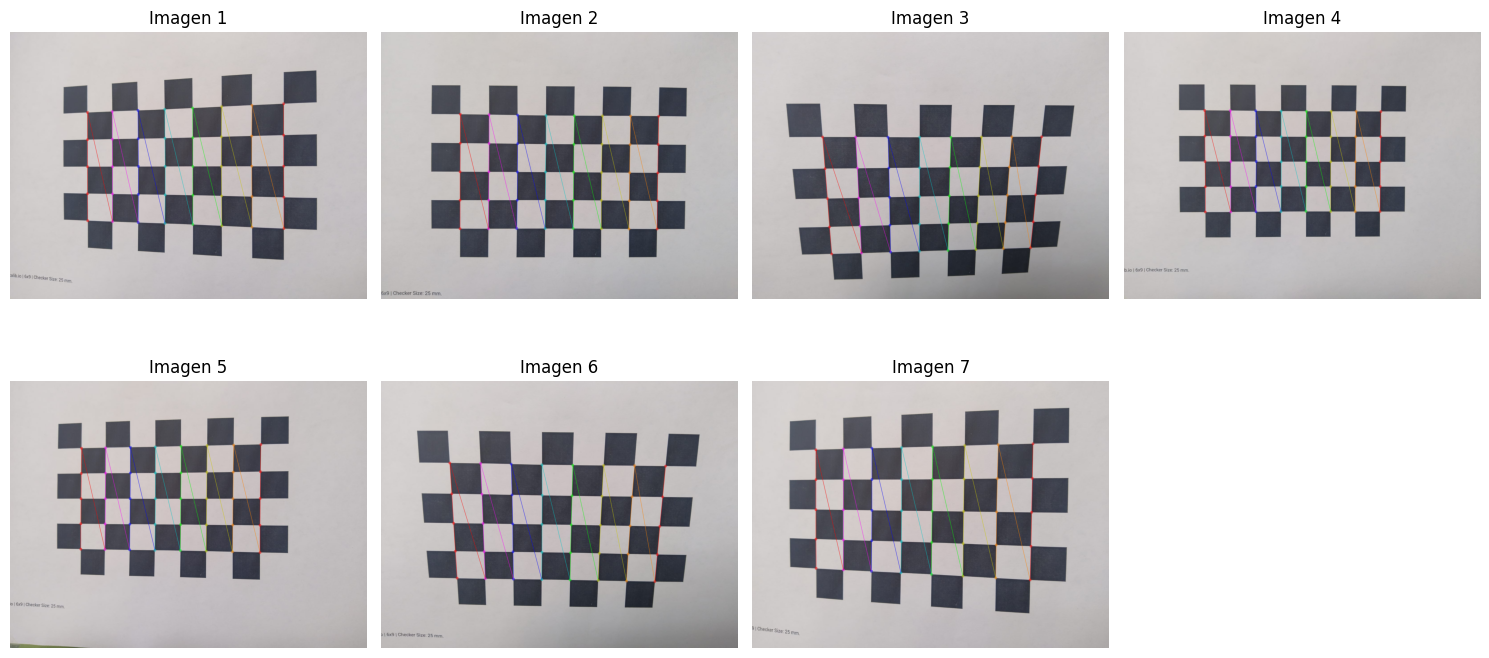

 Camera matrix:
[[1.34284021e+03 0.00000000e+00 8.02708636e+02]
 [0.00000000e+00 1.34947286e+03 6.12478734e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion coefficient:
[[ 2.80321995e-01 -1.91124567e+00 -9.93906402e-06  4.56717980e-04
   4.17397856e+00]]

 Rotation Vectors:
(array([[0.17328427],
       [0.16699732],
       [1.56272335]]), array([[0.17328427],
       [0.16699732],
       [1.56272335]]), array([[0.17328427],
       [0.16699732],
       [1.56272335]]), array([[-0.002403  ],
       [-0.03282548],
       [ 1.57749358]]), array([[ 0.13217133],
       [-0.25991102],
       [ 1.56146164]]), array([[-0.00167546],
       [-0.04623624],
       [ 1.57235036]]), array([[0.08458763],
       [0.09035046],
       [1.5752603 ]]), array([[ 0.17694441],
       [-0.17265077],
       [ 1.57963215]]), array([[0.17441499],
       [0.12079784],
       [1.57887072]]))

 Translation Vectors:
(array([[ 3.04704411],
       [-2.0538296 ],
       [ 9.79065208]]), array([[ 3.047044

In [19]:
images_with_corners = [] # Lista para almacenar las imágenes con esquinas detectadas (para Matplotlib)


for filename in images:
    # Obtener solo el nombre del archivo (ej: 'img01.jpeg') incluso si 'filename' es '../Imagenes_calibracion/img01.jpeg'
    base_filename = os.path.basename(filename)
    image = cv2.imread(filename)
    # Convertir BGR a RGB para la visualización con Matplotlib
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Buscar las esquinas del tablero de ajedrez (patrón de calibración)
    # Si se encuentra el número deseado de esquinas en la imagen, 'ret' será True
    ret, corners = cv2.findChessboardCorners(
                        grayColor, CHECKERBOARD, 
                        cv2.CALIB_CB_ADAPTIVE_THRESH 
                        + cv2.CALIB_CB_FAST_CHECK + 
                        cv2.CALIB_CB_NORMALIZE_IMAGE)

    # Si se puede detectar el número deseado de esquinas,
    # refinar las coordenadas de los píxeles y dibujarlas en la imagen
    if ret == True:
        # Añadir las coordenadas 3D (puntos del mundo real)
        threedpoints.append(objectp3d)

        # Refinar las coordenadas de píxeles
        # para los puntos 2D dados.
        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)

        # Añadir las coordenadas 2D (puntos de píxel)
        twodpoints.append(corners2)

        # Dibujar y mostrar las esquinas en la imagen
        image = cv2.drawChessboardCorners(image, 
                                            CHECKERBOARD, 
                                            corners2, ret)
        
        # Convertir BGR de nuevo a RGB para la visualización en el entorno Jupyter
        rgb_image_corners = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images_with_corners.append(rgb_image_corners) # Almacenar para ver luego


        # Guardar la imagen con las esquinas detectadas en la ruta de salida
        output_filepath = os.path.join(OUTPUT_PATH, f"detected_{base_filename}")
        cv2.imwrite(output_filepath, image)
        print(f"Guardado: {output_filepath}")
        
        
# OPCIONAL: Mostrar todas las imágenes con las esquinas dibujadas al final usando Matplotlib
if images_with_corners:
    num_images = len(images_with_corners)
    # Calcular el número de filas y columnas para el subplots
    cols = min(4, num_images) # Máximo 4 columnas, por ejemplo
    rows = (num_images + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15 * rows / cols))
    axes = axes.flatten()
    
    for i, img_corners in enumerate(images_with_corners):
        axes[i].imshow(img_corners)
        axes[i].set_title(f"Imagen {i+1}")
        axes[i].axis('off')
        
    # Ocultar subplots no utilizados
    for j in range(num_images, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()


# Asegurarse de que tenemos al menos una imagen para obtener la forma necesaria para la calibración
if 'image' in locals() and image is not None:
    h, w = image.shape[:2]
    # Realizar la calibración de la cámara pasando los valores de los puntos 3D (threedpoints)
    # y sus correspondientes coordenadas de píxeles 2D (twodpoints)
    ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
        threedpoints, twodpoints, grayColor.shape[::-1], None, None) # Usamos grayColor.shape[::-1] para el tamaño de la imagen

    # Mostrar la salida requerida
    print(" Camera matrix:")
    print(matrix)
    print("\n Distortion coefficient:")
    print(distortion)
    print("\n Rotation Vectors:")
    print(r_vecs)
    print("\n Translation Vectors:")
    print(t_vecs)
    print("\n Error RMS global")
    print(ret)
else:
    print("No se encontraron imágenes o no se detectaron esquinas en ninguna imagen.")

Directorio creado para imágenes corregidas: ./Imagenes_corregidas/
Guardada imagen corregida: ./Imagenes_corregidas/undistorted_imagen1.jpeg


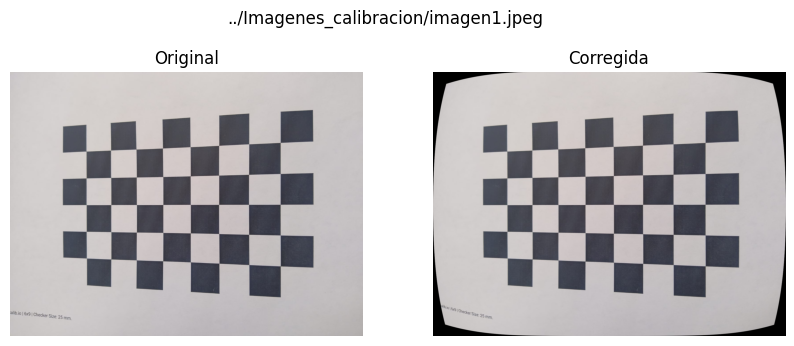

Guardada imagen corregida: ./Imagenes_corregidas/undistorted_imagen2.jpeg


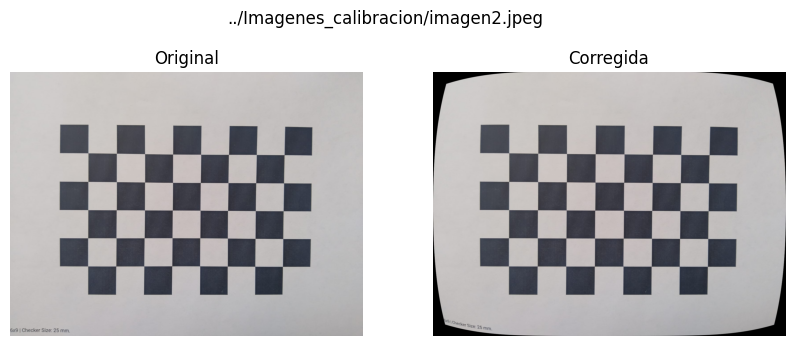

Guardada imagen corregida: ./Imagenes_corregidas/undistorted_imagen3.jpeg


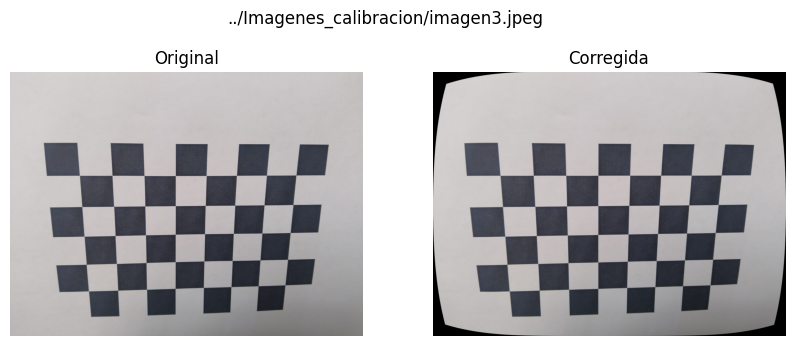

Guardada imagen corregida: ./Imagenes_corregidas/undistorted_imagen4.jpeg


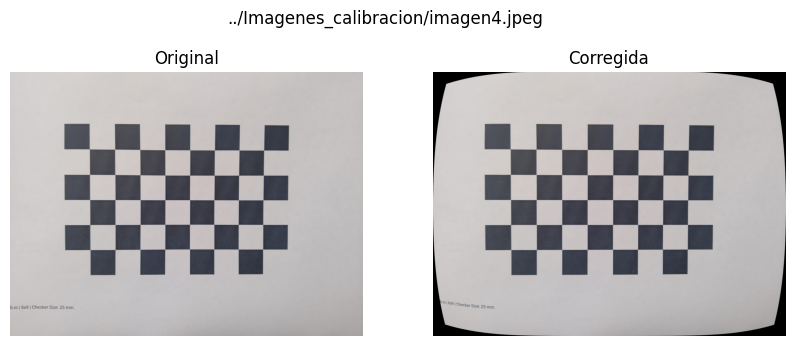

Guardada imagen corregida: ./Imagenes_corregidas/undistorted_imagen5.jpeg


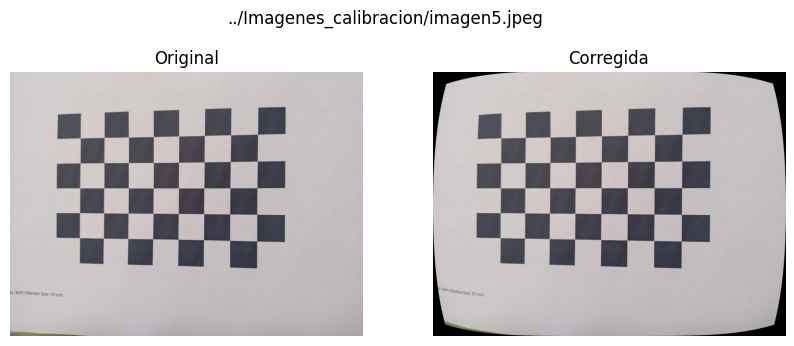

Guardada imagen corregida: ./Imagenes_corregidas/undistorted_imagen6.jpeg


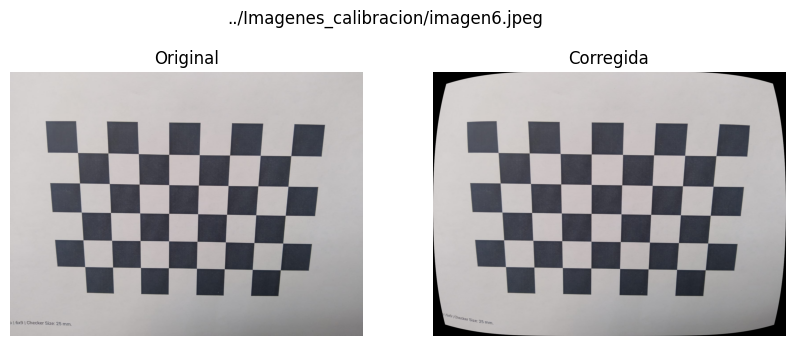

Guardada imagen corregida: ./Imagenes_corregidas/undistorted_imagen7.jpeg


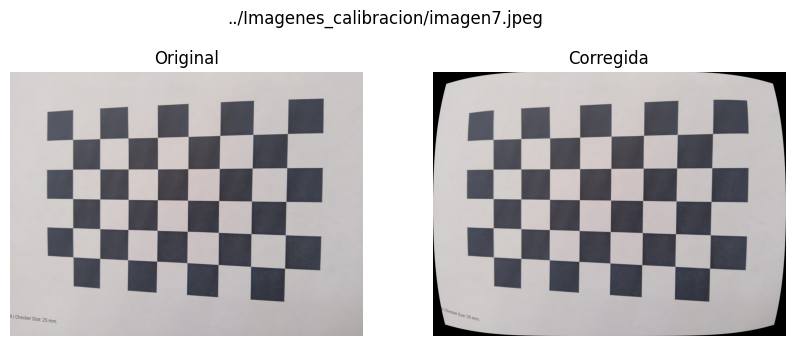

In [20]:
# Definir una nueva ruta de salida específica para las imágenes corregidas
OUTPUT_PATH_UNDISTORTED = '../Imagenes_corregidas/' 

# Crear el directorio de salida si no existe
if not os.path.exists(OUTPUT_PATH_UNDISTORTED):
    os.makedirs(OUTPUT_PATH_UNDISTORTED)
    print(f"Directorio creado para imágenes corregidas: {OUTPUT_PATH_UNDISTORTED}")

# --- MOSTRAR ORIGINAL VS CORREGIDA Y GUARDAR ---

# Mostrar original vs corregida
for filename in images:
    # Obtener el nombre base del archivo
    base_filename = os.path.basename(filename) 
    
    img = cv2.imread(filename)

    if img is None:
        print(f"No se pudo cargar: {filename}")
        continue

    h, w = img.shape[:2]

    # Obtener nueva matriz de cámara sin distorsión
    # El valor '1' indica que se deben conservar todos los píxeles (corte mínimo para eliminar bordes negros)
    new_camera_mtx, roi = cv2.getOptimalNewCameraMatrix(matrix, distortion, (w, h), 1, (w, h))

    # Corregir la distorsión
    undistorted = cv2.undistort(img, matrix, distortion, None, new_camera_mtx)

   # CAMBIO CLAVE: GUARDAR LA IMAGEN CORREGIDA
 
    output_filepath_undistorted = os.path.join(
        OUTPUT_PATH_UNDISTORTED, 
        f"undistorted_{base_filename}"
    )
    cv2.imwrite(output_filepath_undistorted, undistorted)
    print(f"Guardada imagen corregida: {output_filepath_undistorted}")
    # -------------------------------------------------------------------

    # Convertir a RGB para mostrar en matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undist_rgb = cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB)

    # Mostrar lado a lado
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(undist_rgb)
    plt.title("Corregida")
    plt.axis("off")

    plt.suptitle(filename)
    plt.show()

Longitud focal fx: 1344.23
Longitud focal fy: 1350.77
¿fx ≈ fy? Sí

Centro de imagen: (800.0, 600.0)
Punto principal (cx, cy): (801.9, 613.1)
¿Está cerca del centro? Sí


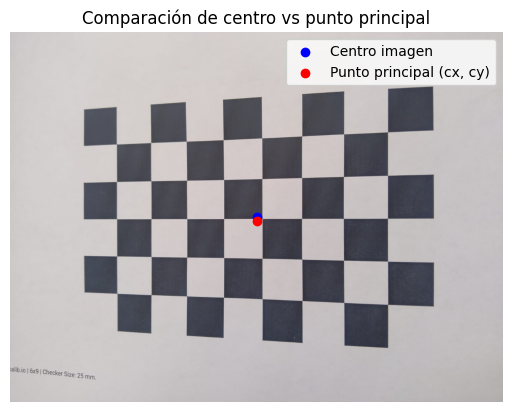

In [12]:
#Cargar una imagen de calibración
img = cv2.imread('../Imagenes_calibracion/imagen1.jpeg')  # ajusta la ruta si es necesario

if img is None:
    print("No se pudo cargar la imagen.")
else:
    h, w = img.shape[:2]

    #Extraer parámetros
    fx = matrix[0, 0]
    fy = matrix[1, 1]
    cx = matrix[0, 2]
    cy = matrix[1, 2]

    #Comparar focales
    print(f"Longitud focal fx: {fx:.2f}")
    print(f"Longitud focal fy: {fy:.2f}")
    print("¿fx ≈ fy?", "Sí" if abs(fx - fy) < 10 else "No")

    #Comparar punto principal con centro de imagen
    center_x = w / 2
    center_y = h / 2
    print(f"\nCentro de imagen: ({center_x:.1f}, {center_y:.1f})")
    print(f"Punto principal (cx, cy): ({cx:.1f}, {cy:.1f})")
    print("¿Está cerca del centro?", "Sí" if abs(cx - center_x) < 20 and abs(cy - center_y) < 20 else "No")

    #Mostrar imagen con marcas
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.scatter([center_x], [center_y], color='blue', label='Centro imagen')
    plt.scatter([cx], [cy], color='red', label='Punto principal (cx, cy)')
    plt.legend()
    plt.title("Comparación de centro vs punto principal")
    plt.axis("off")
    plt.show()